# <font color=maroon>Exercise 1
# EDA & Cleaning: Exploring continuous features

<font size=4>**Using the Titanic dataset** 

<font color=green><b>This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. <br><br> Some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized.<br> <br>Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:
<font color=blue>
- **Name** (str) - Name of the passenger<br><br>
- **Pclass** (int) - Ticket class<br><br>
- **Sex** (str) - Sex of the passenger<br><br>
- **Age** (float) - Age in years<br><br>
- **SibSp** (int) - Number of siblings and spouses aboard<br><br>
- **Parch** (int) - Number of parents and children aboard<br><br>
- **Ticket** (str) - Ticket number<br><br>
- **Fare** (float) - Passenger fare<br><br>
- **Cabin** (str) - Cabin number<br><br>
- **Embarked** (str) - Port C = Cherbourg, Q = Queenstown, S = Southampton)<br><br>

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Import packages and Read in data

In [ ]:
# at the top of the file, before other imports
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

titanic = pd.read_csv('titanic.csv')
titanic.head(20)
        

<font size=5><b>Summary:some people have no cabins. Most people on board are young. They are travellling alone. Some have paid a very low fare.Most of the survived are females. People boarded from Cherbourg have survived more.

In [17]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Explore Numeric features

In [2]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font size=5><b>Summary: 

1.There are missing values in age...

2. A lot of people on the ship are in 3rd class. 
3. There was a baby o board. Oldest person is 80 yrs old. 
4. Mean age of people on the ship is 30. 
5. Mean fare=32. Max fare = 512.00
6. The maximum number of Sibling and spouses is 8 
7. The maximum number of parents and children is 6
 

## T<font color=green>ASK1:  ADD a command to find the shape of the dataset. Hint: use df.shape

In [19]:
titanic.shape

(891, 6)

<font size=4>Conclusion: this dataset has 861 rows and 6 columns

## T<font color=green>ASK2: Get some statistics on the numeric columns Hint: use df.describe()

In [20]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## T<font color=green>ASK3: How many people survived/did not survive?

In [21]:
cccc

0    549
1    342
Name: Survived, dtype: int64

<font size=4>Conclusion: 549 died, 342 survived

## T<font color=green>ASK5: Visualise the Count of survivors 
Hint: sns.countplot(titanic['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

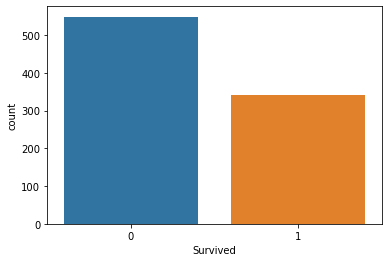

In [22]:
sns.countplot(titanic['Survived'])

<font size=5><b>Summary: 
    Above Countplot shows whether a passenger has survied or not in the x axix against the count of passengers in Y-axis.
    549 passengers have died and 342 have survived. 

## T<font color=green>ASK6: Look at statistics of survivors

In [23]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


## T<font color=green>ASK7: write the conclusion for the above result

<font size=4>Summary Younger people on the ill fated ship seemed to have had a higher chance of survival. Passengers who have paid higher fares seems to have a higher chance of survival. 

In [6]:
titanic.groupby(titanic['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [25]:
titanic1 = pd.read_csv('titanic.csv')
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


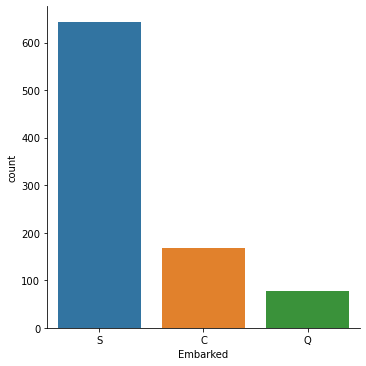

In [26]:

sns.catplot(x='Embarked', data=titanic1, kind='count')

# Write a summary of what the EDA reveals. 

<font size=4>Most passengers seem to have boarded the Titanic from Southhampton. Lowest number of customers are from Queenstown 